### Write a class with the following functions: 
- gp_model()
- minimize()
- set_initial_state()
- stim_state = sample()
- state_est = predict_state()
- transition_stete()


In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# plt.style.use('dark_background')
import GPy

In [2]:
path = "Mark_4sec_CA3PSD_ISO_freqamp_020619.csv"

In [32]:
class state_dr_gp:
    '''
    A class to run a Gaussian Process model. 
    
    
    '''
    def gp_model(self, csv_path):
        
        # Import datasets as pandas
        CA1_df = pd.read_csv(csv_path)
        Y = np.sum(CA1_df.iloc[:, 133:152],axis=1)
        Y_reshape =Y[:, np.newaxis]
        Y_reshape = Y_reshape*1e10
        
        # sum of pre stimulation gamma
        data = np.sum(CA1_df.iloc[:, 33:52], axis=1)
        sum_preStim_gamma = pd.DataFrame(data=data, columns=['sum_preStim_gamma'])
        sum_preStim_gamma = sum_preStim_gamma*1e10
        X = CA1_df.iloc[:,  0:2]
        X_preStim_gamma = X.join(sum_preStim_gamma)
        
        return X_preStim_gamma, Y_reshape; 
    

In [34]:
model = state_dr_gp()
x, y = model.gp_model(path)
print(x)

     Stim_1  Stim_2  sum_preStim_gamma
0        17      30           3.266571
1        42      40           2.425945
2        35      30           3.117866
3        23      50           2.868627
4        42      50           3.521665
..      ...     ...                ...
379      29      40           1.268502
380      17      50           1.239859
381      42      30           1.880050
382       7      50           1.199899
383      23      50           1.343332

[384 rows x 3 columns]


 C:\Users\sinad\AppData\Local\Temp\ipykernel_72940\1403158893.py:12: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


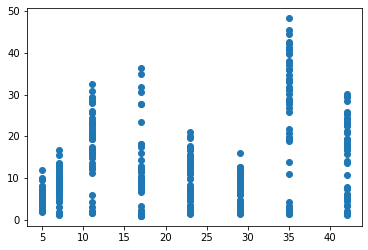

In [35]:
plt.scatter(x['Stim_1'],y)